In [1]:
import pandas as pd

#baca file csv
df = pd.read_csv('/content/Automobile.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          392 non-null    object 
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    int64  
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   model_year    392 non-null    int64  
 8   origin        392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 27.7+ KB


In [2]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140,3449,10.5,70,usa


In [3]:
X = df.drop(['name', 'origin'], axis=1)

X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [ ]:
from sklearn.cluster import KMeans

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

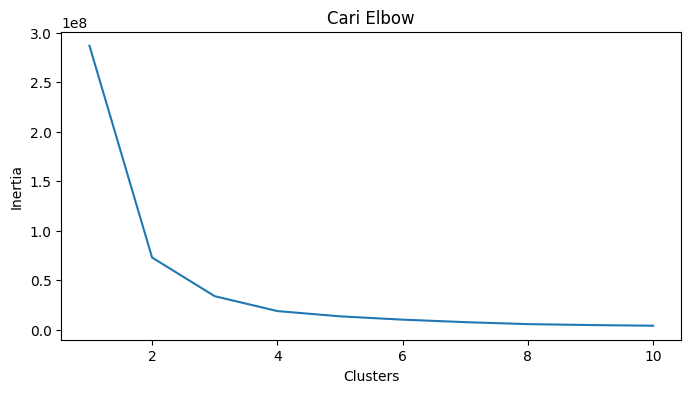

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [ ]:
# membuat objek KMeans
km5 = KMeans(n_clusters=3).fit(X)

In [13]:
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

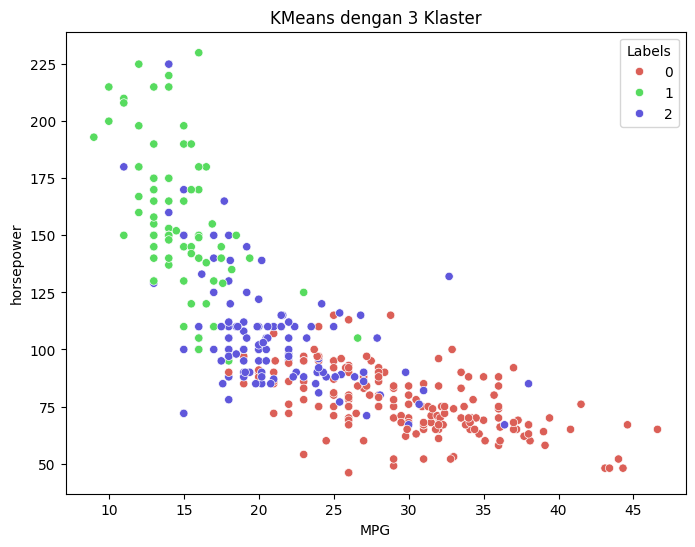

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['mpg'], y=X['horsepower'], hue=X['Labels'], palette=sns.color_palette('hls', 3))
plt.title('KMeans dengan 3 Klaster')
plt.xlabel('MPG')
plt.ylabel('horsepower')
plt.show()